# 3.4 영화 리뷰 분류: 이진 분류 예제

IMDB 데이터셋
- IMDB란 인터넷 영화 데이터베이스(Internet Movie Database)에서 가져온 리뷰 5만 개로 이루어져 있다. 이 데이터셋은 훈련 데이터 25,000개와 테스트 데이터 25,000개로 나누어져 있으며 각각 50%는 긍정, 나머지 50%는 부정 리뷰로 구성되어 있다.
- 이 예제에서는 IMDB의 리뷰 텍스트를 기반으로 영화 리뷰를 긍정과 부정으로 분류한다.
- 먼저 리스트를 원-핫 인코딩하여 0과 1의 벡터로 변환 후 relu 함수로 Dense를 쌓아 모델을 생성한다. 손실함수는 binary_crossentropy, 옵티마이저는 rmsprop을 이용한다.
- 입력 데이터는 벡터(리뷰 텍스트), 출력 데이터는 스칼라(긍정, 부정)이다.

### 3-1 IMDB 데이터셋 로드하기

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


### 3-2 정수 시퀀스를 이진 행렬로 인코딩하기

In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1
    return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

### 3-3 모델 정의하기

In [3]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

W0729 19:24:24.603719  1712 deprecation_wrapper.py:119] From C:\Users\gjbr5\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0729 19:24:24.640618  1712 deprecation_wrapper.py:119] From C:\Users\gjbr5\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0729 19:24:24.650592  1712 deprecation_wrapper.py:119] From C:\Users\gjbr5\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



### 3-4 모델 컴파일하기

In [4]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

W0729 19:24:24.699461  1712 deprecation_wrapper.py:119] From C:\Users\gjbr5\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0729 19:24:24.717413  1712 deprecation_wrapper.py:119] From C:\Users\gjbr5\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0729 19:24:24.722399  1712 deprecation.py:323] From C:\Users\gjbr5\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### 3-5 옵티마이저 설정하기

In [5]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])

### 3-6 손실과 측정을 함수 객체로 지정하기

In [6]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.01), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

### 3-7 검증 세트 준비하기

In [7]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

### 3-8 모델 훈련하기

In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history=model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

W0729 19:24:25.012573  1712 deprecation_wrapper.py:119] From C:\Users\gjbr5\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.4976 - acc: 0.7953 - val_loss: 0.3717 - val_acc: 0.8722
Epoch 2/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.2957 - acc: 0.9046 - val_loss: 0.2990 - val_acc: 0.8910
Epoch 3/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.2160 - acc: 0.9286 - val_loss: 0.3088 - val_acc: 0.8713
Epoch 4/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.1742 - acc: 0.9433 - val_loss: 0.2830 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.1414 - acc: 0.9543 - val_loss: 0.2863 - val_acc: 0.8851
Epoch 6/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.1143 - acc: 0.9653 - val_loss: 0.3086 - val_acc: 0.8811
Epoch 7/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.0970 - acc: 0.9709 - val_loss: 0.3147 - 

### 3-9 훈련과 검증 손실 그리기

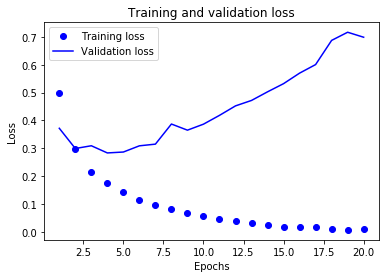

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 3-10 훈련과 검증 정확도 그리기

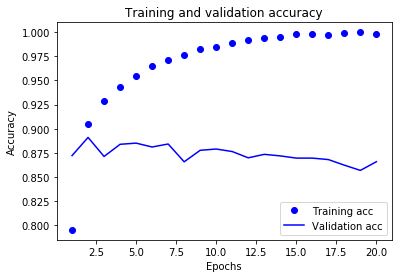

In [10]:
plt.clf()
acc=history_dict['acc']
val_acc=history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 3-11 모델을 처음부터 다시 훈련하기

In [11]:
model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results=model.evaluate(x_test, y_test)

print(results)

Epoch 1/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.4745 - acc: 0.8215
Epoch 2/4
25000/25000 [==============================] - 2s 69us/step - loss: 0.2635 - acc: 0.9101
Epoch 3/4
25000/25000 [==============================] - 2s 70us/step - loss: 0.1986 - acc: 0.9309
Epoch 4/4
25000/25000 [==============================] - 2s 91us/step
[0.3240022992515564, 0.87252]
